# Preparation des données
### Initialisation du projet

In [1]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Importation

In [2]:
import os
import pandas as pd

DATASETS_PATH = os.path.join(".\datasets")

def load_datasets_data(dataset_path=DATASETS_PATH):
	csv_general = pd.read_csv(os.path.join(dataset_path, "general_data.csv"))
	csv_manager = pd.read_csv(os.path.join(dataset_path, "manager_survey_data.csv"))
	csv_employee = pd.read_csv(os.path.join(dataset_path, "employee_survey_data.csv"))
	csv_intime = pd.read_csv(os.path.join(dataset_path, "in_time.csv"))
	csv_outtime = pd.read_csv(os.path.join(dataset_path, "out_time.csv"))
	return csv_general, csv_manager, csv_employee, csv_intime, csv_outtime

In [3]:
general_set, manager_set, employee_set, intime_set, outtime_set = load_datasets_data()

In [4]:
dataset_merge = general_set.merge(employee_set.merge(manager_set, on="EmployeeID"), on="EmployeeID")
dataset = dataset_merge.copy()
pd.DataFrame.head(dataset, 5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Nettoyage des données / Complétion

In [5]:
#https://prod.liveshare.vsengsaas.visualstudio.com/join?6712A4B62ABC55A3AC374AFD25A834927C4D

incomplete_attributes = ["NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance", "TotalWorkingYears"]

for attribute in incomplete_attributes:
	median = dataset[attribute].median()
	dataset[attribute].fillna(median, inplace=True) # option 3

#Autre methode
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
rawArray = ["Age","DistanceFromHome","Education","TotalWorkingYears",
	"TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager",
	"EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","JobInvolvement", "NumCompaniesWorked" ]

dataset_yes = dataset.where(dataset["Attrition"]=="Yes", 0)
dataset_no  = dataset.where(dataset["Attrition"]=="No", 1)

dataset_yes = dataset_yes.loc[dataset_yes["Attrition"] != 0]
dataset_no = dataset_no.loc[dataset_no["Attrition"] != 1]

print("Attrition NO: ", len(dataset_no) ," Attrition YES: ", len(dataset_yes))

print(711/4410*100)
# for col in rawArray:
#     plt.boxplot([dataset_yes[col].apply(np.int64), dataset_no[col].apply(np.int64)])
#     print(col)
#     plt.show()

# for col in rawArray:
# 	print(col)
# 	plt.hist(dataset_yes[col].apply(np.int64), color="red", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()
# 	plt.hist(dataset_no[col].apply(np.int64), color="green", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()

Attrition NO:  3699  Attrition YES:  711
16.122448979591837


In [8]:
corr_array = ["Age", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]


In [9]:
# Data frame is created under column name Name and Attrition
data_frame = pd.DataFrame(dataset, columns=["Attrition"])
 
# Data of Attrition is converted into Binary Data
df_one = pd.get_dummies(data_frame["Attrition"])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)
 
# Attritioncolumn is dropped
df_two = df_two.drop(["Attrition"], axis=1)
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)
 
# Rename the Column
result = df_two.rename(columns={"Yes": "Attrition"})

dataset_test = dataset.copy()
attrition = result["Attrition"]

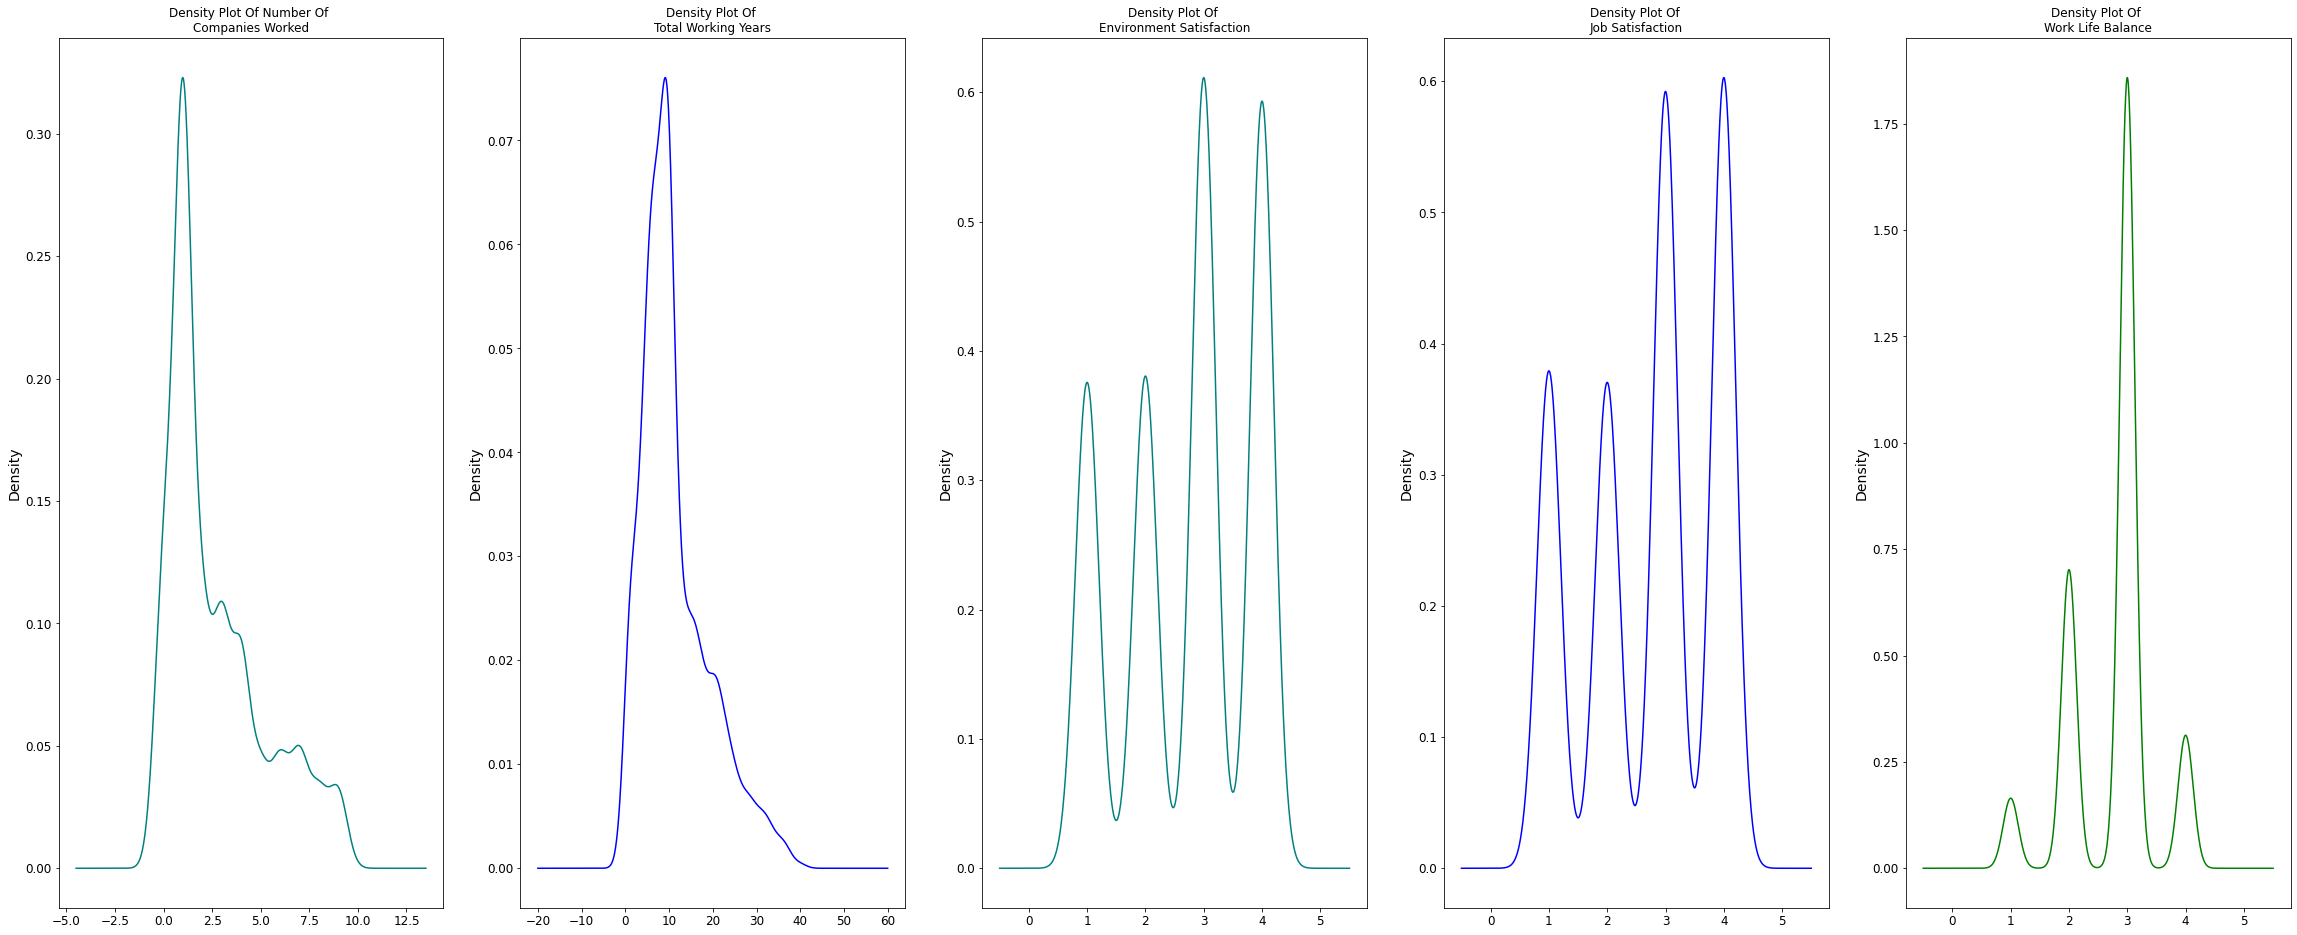

In [10]:
plt.figure(figsize=(40,16))

plt.subplot(1,5,1)
dataset['NumCompaniesWorked'].plot(kind='density', color='teal')
plt.title('Density Plot Of Number Of \nCompanies Worked')

plt.subplot(1,5,2)
dataset['TotalWorkingYears'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nTotal Working Years')

plt.subplot(1,5,3)
dataset['EnvironmentSatisfaction'].plot(kind='density', color='teal')
plt.title('Density Plot Of \nEnvironment Satisfaction')

plt.subplot(1,5,4)
dataset['JobSatisfaction'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nJob Satisfaction')

plt.subplot(1,5,5)
dataset['WorkLifeBalance'].plot(kind='density', color='green')
plt.title('Density Plot Of \nWork Life Balance')

plt.show()

### new prepa donnée

In [210]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(dataset); 

In [211]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
dataset['BusinessTravel'] = labelEncoder_X.fit_transform(dataset['BusinessTravel'])
dataset['Department'] = labelEncoder_X.fit_transform(dataset['Department'])
dataset['EducationField'] = labelEncoder_X.fit_transform(dataset['EducationField'])
dataset['Gender'] = labelEncoder_X.fit_transform(dataset['Gender'])
dataset['JobRole'] = labelEncoder_X.fit_transform(dataset['JobRole'])
dataset['MaritalStatus'] = labelEncoder_X.fit_transform(dataset['MaritalStatus'])
dataset['Over18'] = labelEncoder_X.fit_transform(dataset['Over18'])

In [212]:
dataset.describe()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,1.0,1.607483,1.260544,9.192517,2.912925,2.247619,1.0,2205.500000,0.600000,2.063946,...,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,0.0,0.665304,0.527673,8.105026,1.023933,1.331067,0.0,1273.201673,0.489954,1.106689,...,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1.0,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1103.250000,0.000000,1.000000,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,1.0,2.000000,1.000000,7.000000,3.000000,2.000000,1.0,2205.500000,1.000000,2.000000,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.0,2.000000,2.000000,14.000000,4.000000,3.000000,1.0,3307.750000,1.000000,3.000000,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,1.0,2.000000,2.000000,29.000000,5.000000,5.000000,1.0,4410.000000,1.000000,5.000000,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Test Pipeline	

In [200]:
dataset_pl = dataset.copy()
ds_num = dataset_pl.select_dtypes(include=[np.number])
ds_str = dataset_pl.select_dtypes(exclude=[np.number])

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()

oh_encoder.fit(ds_str)
# dataset.head(10)

num_attribs = list(ds_num)
str_attribs = list(ds_str)

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy="median")), 
	('std_scaler', StandardScaler()),			   
])

ordinal_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("str", encoder, str_attribs),
])

ohe_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("str", oh_encoder, str_attribs),
])



# dataset_pipeline = ordinal_pipeline.fit_transform(dataset_pl)
dataset_pipeline = ohe_pipeline.fit_transform(dataset_pl)
# dataset_pipeline

In [202]:
dataset_prepared = pd.DataFrame(
    dataset_pipeline,
    columns=list(np.concatenate((num_attribs, oh_encoder.get_feature_names(str_attribs))))  # Si OHE, utilise np.concat ci-dessous
)
# columns=list(np.concatenate((num_attribs, oh_encoder.get_feature_names(str_attribs))))     #OHE
# columns=list(dataset_pl.columns) 		 #OrdinalEncoder
# dataset_prepared.info()

C:\Users\ASUS STRIX SCAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [214]:
dataset_prepared = dataset.copy()
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int32  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int32  
 12  MaritalStatus            4410 non-null   int32  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [215]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
useless_value = ['Attrition','StandardHours','Education','EmployeeCount','EmployeeID', "Over18", "Gender", "Department"] #Ordinal
# useless_value = ['StandardHours','Education','EmployeeCount','EmployeeID', "Over18_Y", "Gender_Female","Gender_Male"] #OHE
dataset_prepared = dataset_prepared.drop(useless_value, axis = 1)
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   int32  
 2   DistanceFromHome         4410 non-null   int64  
 3   EducationField           4410 non-null   int32  
 4   JobLevel                 4410 non-null   int64  
 5   JobRole                  4410 non-null   int32  
 6   MaritalStatus            4410 non-null   int32  
 7   MonthlyIncome            4410 non-null   int64  
 8   NumCompaniesWorked       4410 non-null   float64
 9   PercentSalaryHike        4410 non-null   int64  
 10  StockOptionLevel         4410 non-null   int64  
 11  TotalWorkingYears        4410 non-null   float64
 12  TrainingTimesLastYear    4410 non-null   int64  
 13  YearsAtCompany           4410 non-null   int64  
 14  YearsSinceLastPromotion 

In [179]:
# plt.figure(figsize = (50,40))   
# sns.heatmap(dataset_prepared.corr(),annot = True,cmap="tab20c")
# plt.show()

### def x,y

In [216]:
y = attrition
x = dataset_prepared
# y = attrition
# x = dataset_prepared.drop(['Attrition_Yes', 'Attrition_No'], axis = 1) 

In [217]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   int32  
 2   DistanceFromHome         4410 non-null   int64  
 3   EducationField           4410 non-null   int32  
 4   JobLevel                 4410 non-null   int64  
 5   JobRole                  4410 non-null   int32  
 6   MaritalStatus            4410 non-null   int32  
 7   MonthlyIncome            4410 non-null   int64  
 8   NumCompaniesWorked       4410 non-null   float64
 9   PercentSalaryHike        4410 non-null   int64  
 10  StockOptionLevel         4410 non-null   int64  
 11  TotalWorkingYears        4410 non-null   float64
 12  TrainingTimesLastYear    4410 non-null   int64  
 13  YearsAtCompany           4410 non-null   int64  
 14  YearsSinceLastPromotion 

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y)

In [175]:
# corrmat = X_train.corr() 
# corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# corrdf = corrdf.unstack().reset_index()
# corrdf.columns = ['Var1', 'Var2', 'Correlation']
# corrdf.dropna(subset = ['Correlation'], inplace = True)
# corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# corrdf['Correlation'] = abs(corrdf['Correlation'])
# matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
# matrix

# Indicateurs de qualité

### log qui trouve les meilleurs param

In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [161]:
y_pred = classifier.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [163]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8480698104484512

In [164]:
from sklearn.model_selection import GridSearchCV
grid = {"C": np.arange(0.3,0.4,0.01),
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "max_iter": [200]
       }
classifier_opt = GridSearchCV(classifier, grid, scoring = 'accuracy', cv=10)
classifier_opt.fit(X_train,y_train)
print("Tuned_parameter k : {}".format(classifier_opt.best_params_))
print("Best Score: {}".format(classifier_opt.best_score_))

Tuned_parameter k : {'C': 0.33, 'max_iter': 200, 'solver': 'liblinear'}
Best Score: 0.8487181103685959


In [165]:
classifier = LogisticRegression(C=0.33, solver="liblinear", max_iter=200)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8487181103685959

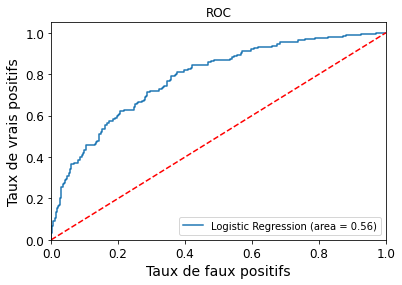

In [166]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### log 79%

In [225]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8405139833711263
[[1108    2]
 [ 209    4]]


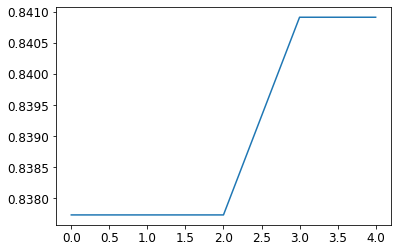

In [222]:
log_score = cross_val_score(estimator=LogisticRegression(), X=X_test, y=y_test) 
plt.plot(log_score)

### log avec QuantileTransformer 72%

In [126]:
# from sklearn import preprocessing

# quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',random_state=0)
# x_train_scaled = quantile_transformer.fit_transform(X_train)
# x_test_scaled = quantile_transformer.fit_transform(X_test)

# model=LogisticRegression()
# model.fit(x_train_scaled,y_train)
# y_predict=model.predict(x_test_scaled)
# model_score=model.score(x_test_scaled,y_test)
# print('Accuracy = ',model_score)
# print(metrics.confusion_matrix(y_test,y_predict))

Accuracy =  0.8518518518518519
[[1078   32]
 [ 164   49]]


In [226]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1110
           1       0.67      0.02      0.04       213

    accuracy                           0.84      1323
   macro avg       0.75      0.51      0.47      1323
weighted avg       0.81      0.84      0.77      1323



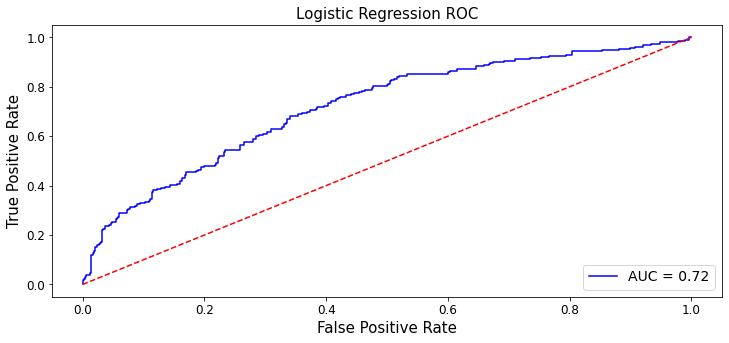

In [227]:
from sklearn import metrics

plt.figure(figsize=(12,5))

lrprob = lr.predict_proba(X_test)
lr_pred = lrprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Logistic Regression ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()
